In [23]:
"""
Normal distribution. 
Using histograms with and without cumulative option observe how increasing variance and mean changes look of the distribution. 
Check how number of bins influences the plots. 
Consider what would make normal distribution weekly informative and what will make it informative
"""
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

normal_dict = {
    "normal":      np.random.normal(size=10000),                    # Informative        (look out 7)
    "normal_0_30": np.random.normal(loc=0.0,scale=30.0,size=10000), # Weekly informative (look out 7)
    "normal_5_3":  np.random.normal(loc=5.0,scale=3.0,size=10000)   # Informative        (look out 7)
}

In [24]:
# Create pandas dataframe from python dictionary
df = pd.DataFrame.from_dict(normal_dict)
# Show first 5 rows, just for information
df.head()

,normal,normal_0_30,normal_5_3
0,-0.320971,-8.544982,7.176244
1,0.254012,-47.813340,4.712773
2,-0.612231,-12.346148,8.218228
3,1.367480,17.054768,2.308437
4,-0.724062,-1.070873,1.425764


In [25]:
# Consolidate dataframe to two columns. One column "variable" describes the variable name, 
# the second column "value" keeps value of variable
melted_df = df.melt()

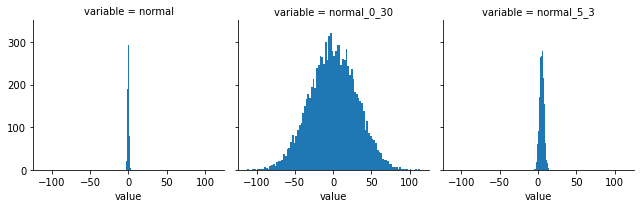

In [26]:
# Maps a dataset onto multiple axes 
Graph = sns.FacetGrid(melted_df, col="variable", sharex=True)
# Apply ploting function - histogram
Graph.map(plt.hist,"value",cumulative=False,bins=100)

# Conclusion: increasing variance makes data less informative
# Conclusion: mean only moves data along x axis
# Conclusion: bins reflects how detailed out plot is

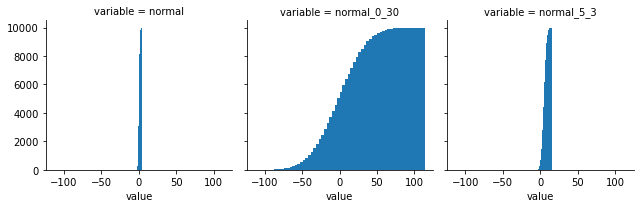

In [27]:
GraphCum = sns.FacetGrid(melted_df, col="variable", sharex=True)
GraphCum.map(plt.hist,"value", cumulative=True,bins=64)

In [28]:
"""
Transform samples from normal distribution with inverse logit. 
Consider how mean and standard deviation influence the shape of histogram and cdf. 
Is previously non-informative normal is still non-informative after transformation?
"""

# Inverse logit  transforms a real number (usually the logarithm of the odds) 
# to a value (usually probability p) in the interval [0,1]. The invlogit function is 1 / 1+exp(−x).

# Create melted inverse logit dataframe
from scipy.special import expit
expit_df = expit(df)
melted_expit_df = expit_df.melt()

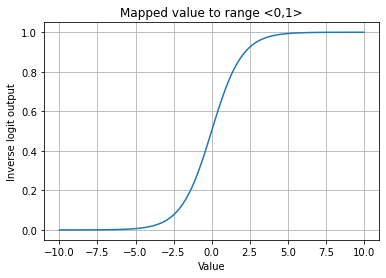

In [35]:
# Inverse logit example
x = np.linspace(start=-10, stop=10, num=100)
y = expit(x)
plt.plot(x,y, label="Inverse logit mapping")
plt.xlabel("Value")
plt.ylabel("Inverse logit output")
plt.title("Mapped value to range <0,1>")
plt.grid()

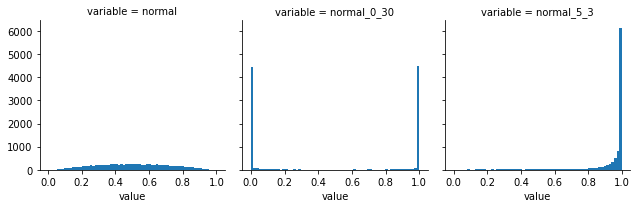

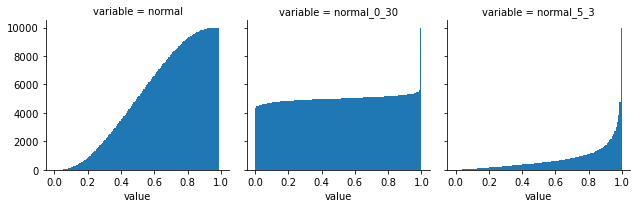

In [29]:
# Maps a dataset onto multiple axes and plot histograms
GraphExpit = sns.FacetGrid(melted_expit_df, col="variable", sharex=True, col_wrap=3)
GraphExpit.map(plt.hist, "value", cumulative=False, bins=64)
GraphExpitCum = sns.FacetGrid(melted_expit_df, col="variable", sharex=True, col_wrap=3)
GraphExpitCum.map(plt.hist, "value", cumulative=True, bins=128)

# Inverse logit transforms real numbers to range <0,1>
# Conclusion: Previously weekly informative disctibution is still weekly informative. 
#             We received a huge tails in 0 and 1 but it does not mean anything 

In [38]:
"""
Poisson distribution. 
This distribution returns integers (give histogram location of bins instead of their numbers), depending on intensity. 
This is a good distribution for modelling countable effects. 
Observe how mean and variance influence the shape.
"""

poisson_dict={
    "Poisson_Interval=1":  np.random.poisson(1,100000),
    "Poisson_Interval=5":  np.random.poisson(4,100000),
    "Poisson_Interval=10":  np.random.poisson(9,100000),
    "Poisson_Interval=20": np.random.poisson(20,100000)
}

In [39]:
# Create poisson dataframe from python dictionary and melt dataframe
poisson_df = pd.DataFrame.from_dict(poisson_dict)
poisson_melted = poisson_df.melt()

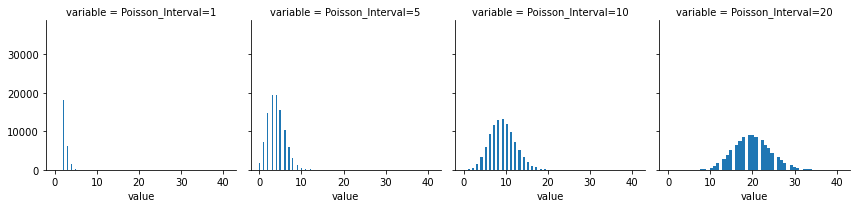

In [40]:
# Maps a dataset onto multiple axes and apply plotting function - histogram
Graph_Poisson = sns.FacetGrid(poisson_melted, col="variable", sharex=True, col_wrap=4)
Graph_Poisson.map(plt.hist, "value", cumulative=False, bins=50)

# Y axis - how many times phenomenon occurs
# X axis - time period

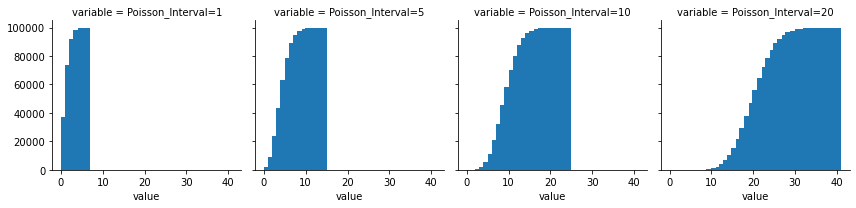

In [41]:
Graph_Poisson_Cum = sns.FacetGrid(poisson_melted, col="variable", sharex=True, col_wrap=4)
Graph_Poisson_Cum.map(plt.hist, "value", cumulative=True, bins=100)

The probability that you will see Ferrari in Krakow on 10 day is: 0.187%
The probability that you will see Ferrari in Krakow in 10 days is: 0.268%
The probability that you will see Ferrari in Krakow in 25 days is: 83.960%


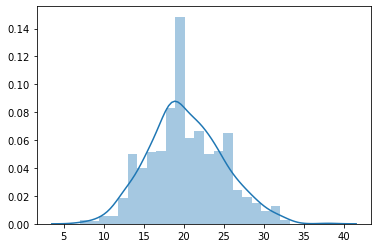

In [72]:
# Example
# On average Ferrari is seen in Krakow once for 20 days. 

# What's the probability to see Ferrari in Krakow on 10 day ?
from scipy.stats import poisson
probability_ferrari = poisson.pmf(20, 10)
print("The probability that you will see Ferrari in Krakow on 10 day is: {:.3f}%".format(probability_ferrari*100))

# What's the probability to see Ferrari in Krakow in 10 days ?
probability_ferrari_cdf = 0
for i in range(1, 10+1):
    probability_ferrari_cdf += poisson.pmf(20, i)
print("The probability that you will see Ferrari in Krakow in 10 days is: {:.3f}%".format(probability_ferrari_cdf*100))

# What's the probability to see Ferrari in Krakow in 25 day ?
probability_ferrari_cdf = 0
for i in range(1, 25+1):
    probability_ferrari_cdf += poisson.pmf(20, i)
print("The probability that you will see Ferrari in Krakow in 25 days is: {:.3f}%".format(probability_ferrari_cdf*100))

sns.distplot(np.random.poisson(20, size=1000), kde=True)

In [23]:
"""
Beta distribution. 
This is a distribution defined on [0,1] interval. 
It is useful as a prior for probability parameters (like binomial distribution). 
Traditionally it is defined with $\alpha$ and $\beta$ parameters. 
There are however different reparametrizations possible. 
Verify how beta distributions behave for their natural parametrization, location dispersion parametrization and mean-population size parametrization (see lecture notes)
"""


beta_dict={
    "Beta_alpha=1_beta=1":  np.random.beta(1, 1, 10000),
    "Beta_alpha=10_beta=1": np.random.beta(10,1, 10000),
    "Beta_alpha=1_beta=10": np.random.beta(1, 10,10000),
    "Beta_alpha=10_beta=10":np.random.beta(10,10,10000),
    "Beta_alpha=3_beta=9":  np.random.beta(3, 9, 10000),
    "Beta_alpha=8_beta=2":  np.random.beta(0.1, 0.1, 10000)
}

In [24]:
# Create beta dataframe from python dictionary and melt dataframe
beta_df = pd.DataFrame.from_dict(beta_dict)
beta_melted = beta_df.melt()

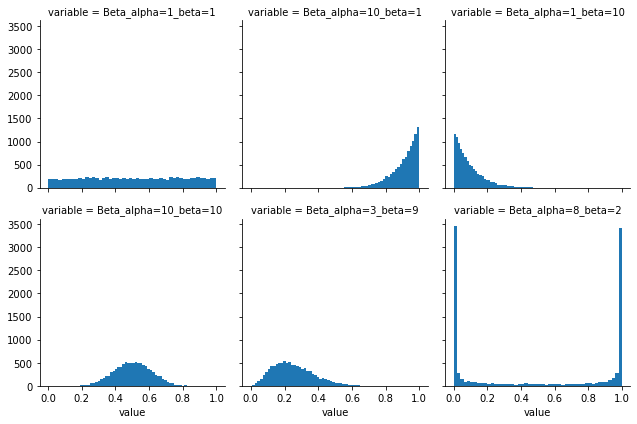

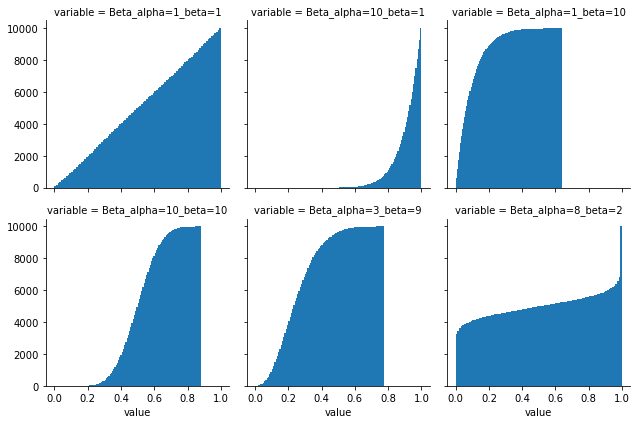

In [25]:
# Maps a dataset onto multiple axes and apply plotting function - histogram
Graph_Beta = sns.FacetGrid(beta_melted, col="variable", sharex=True, col_wrap=3)
Graph_Beta.map(plt.hist, "value", cumulative=False, bins=50)
Graph_Beta_Cum = sns.FacetGrid(beta_melted, col="variable", sharex=True, col_wrap=3)
Graph_Beta_Cum.map(plt.hist, "value", cumulative=True, bins=100)

In [17]:
"""
Log-normal distribution. 
This is a great distributions for positive variables, especially if scale can differ (for example salaries). 
Assumtion is that the logarithm of variable of interest is normaly distributed. 
Observe how mean and variance of normal distribution are propagating through transformation.
"""

lognormal_dict={
    "Lognormal_M=0_S=0.1":     np.random.lognormal(0, 0.1, 10000),
    "Lognormal_M=0_S=0.5":     np.random.lognormal(0, 0.5,   10000),
    "Lognormal_M=0_S=1":       np.random.lognormal(0, 1,  10000),
    "Lognormal_M=5_S=0.1":     np.random.lognormal(5, 0.1, 10000),
    "Lognormal_M=5_S=0.5":     np.random.lognormal(5, 0.5,   10000),
    "Lognormal_M=5_S=1":       np.random.lognormal(5, 1,  10000)
}

In [20]:
# Create beta dataframe from python dictionary and melt dataframe
lognormal_df = pd.DataFrame.from_dict(lognormal_dict)
lognormal_melted = lognormal_df.melt()

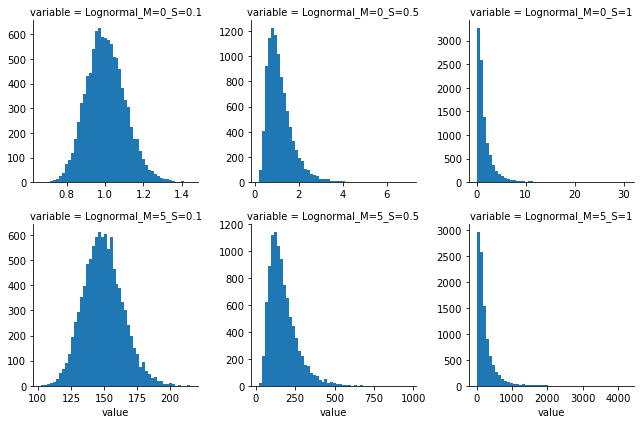

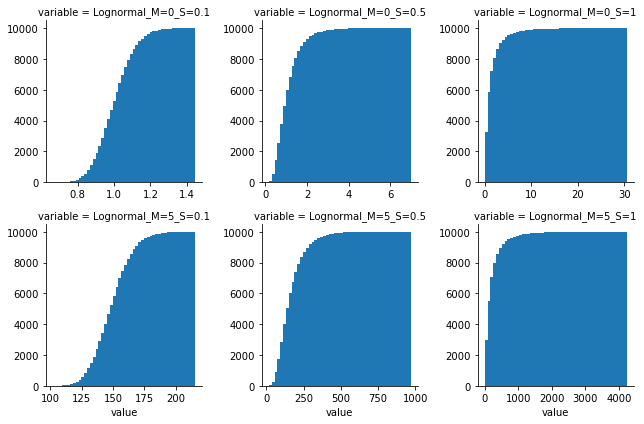

In [22]:
# Maps a dataset onto multiple axes and apply plotting function - histogram
Graph_Lognormal = sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=3)
Graph_Lognormal.map(plt.hist, "value", cumulative=False, bins=50)
Graph_Lognormal_Cum = sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=3)
Graph_Lognormal_Cum.map(plt.hist, "value", cumulative=True, bins=50)